# Librerías

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
# import plotly.express as px
# import plotly.graph_objects as go
# import matplotlib.pyplot as plt
# import json

# Datos

In [53]:
df = pd.read_csv('../../Data/IPS_Atencion_Capacidad_Transformed.csv')

In [54]:
df

,codigo_sede,num nivel atencion,naturaleza,Ambulancias-Básica,Ambulancias-Medicalizada,Camas-Adultos,Camas-Atención del Parto,Camas-Cuidado Agudo Mental,Camas-Cuidado Intensivo Adulto,Camas-Cuidado Intensivo Neonatal,...,Salas-Procedimientos,Salas-Quirófano,Salas-Sala de Cirugía,Salas-Sala de Radioterapia,Sillas-Otras patologías,Sillas-SPA,Sillas-Salud Mental,Sillas-Sillas de Hemodiálisis,Sillas-Sillas de Quimioterapia,Unidad movil-Unidad Móvil
0,50010001201,NaN,Privada,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,50010016401,NaN,Privada,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
2,50010025201,NaN,Privada,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,50010025204,NaN,Privada,0,0,0,0,0,0,0,...,6,0,0,0,0,0,0,0,0,0
4,50010029701,NaN,Privada,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15542,996240000609,2.0,Pública,2,0,6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
15543,997730000607,2.0,Pública,3,0,12,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
15544,997730011401,NaN,Privada,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15545,997730013001,NaN,Privada,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [55]:
df_publicas = df[df['naturaleza'] == 'Pública'].copy()
df_publicas.dropna(inplace=True)
df_publicas['num nivel atencion'] = df_publicas['num nivel atencion'].astype('int64')

In [56]:
df_publicas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3312 entries, 79 to 15543
Data columns (total 66 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   codigo_sede                                        3312 non-null   int64 
 1   num nivel atencion                                 3312 non-null   int64 
 2   naturaleza                                         3312 non-null   object
 3   Ambulancias-Básica                                 3312 non-null   int64 
 4   Ambulancias-Medicalizada                           3312 non-null   int64 
 5   Camas-Adultos                                      3312 non-null   int64 
 6   Camas-Atención del Parto                           3312 non-null   int64 
 7   Camas-Cuidado Agudo Mental                         3312 non-null   int64 
 8   Camas-Cuidado Intensivo Adulto                     3312 non-null   int64 
 9   Camas-Cuidado Intensiv

In [57]:
df_publicas

,codigo_sede,num nivel atencion,naturaleza,Ambulancias-Básica,Ambulancias-Medicalizada,Camas-Adultos,Camas-Atención del Parto,Camas-Cuidado Agudo Mental,Camas-Cuidado Intensivo Adulto,Camas-Cuidado Intensivo Neonatal,...,Salas-Procedimientos,Salas-Quirófano,Salas-Sala de Cirugía,Salas-Sala de Radioterapia,Sillas-Otras patologías,Sillas-SPA,Sillas-Salud Mental,Sillas-Sillas de Hemodiálisis,Sillas-Sillas de Quimioterapia,Unidad movil-Unidad Móvil
79,50010214401,3,Pública,0,0,176,0,0,48,10,...,3,8,0,0,0,0,0,0,4,0
87,50010217802,2,Pública,0,2,47,0,0,0,0,...,1,0,3,0,0,0,0,0,0,0
88,50010217804,2,Pública,0,0,43,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
89,50010217807,2,Pública,0,0,12,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
90,50010217808,2,Pública,24,0,34,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15535,976660000103,2,Pública,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15536,990010000601,2,Pública,3,0,15,0,0,0,0,...,1,0,2,0,0,0,0,0,0,1
15540,995240000608,2,Pública,2,0,6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
15542,996240000609,2,Pública,2,0,6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Desbalanceo

In [58]:
df_publicas.groupby(['num nivel atencion']).agg(count=('codigo_sede', 'count'))

,count
num nivel atencion,
1,2738
2,416
3,158


# Modelo

## X and Y

In [59]:
y = df_publicas['num nivel atencion'].copy()
X = df_publicas[list(df_publicas.columns)[3:]].copy()

## Train - Test Split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1, shuffle=True)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2318, 63), (994, 63), (2318,), (994,))

## Scale

In [62]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training

In [12]:
clf_svc = SVC(decision_function_shape='ovo',
              random_state=1,
              probability=True)
clf_svc.fit(X_train_scaled, y_train)

SVC(decision_function_shape='ovo', probability=True, random_state=1)

## Testing

In [13]:
predictions = clf_svc.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions)

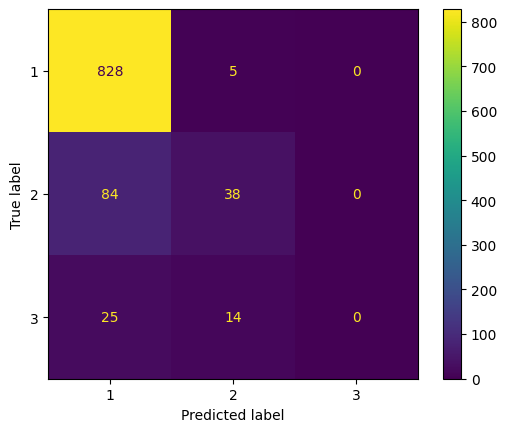

In [14]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_svc.classes_)
disp.plot()

In [15]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.88      0.99      0.94       833
           2       0.67      0.31      0.42       122
           3       0.00      0.00      0.00        39

    accuracy                           0.87       994
   macro avg       0.52      0.44      0.45       994
weighted avg       0.82      0.87      0.84       994



c:\Users\SGM\Documents\Proyecto de Grado\env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SGM\Documents\Proyecto de Grado\env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SGM\Documents\Proyecto de Grado\env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [16]:
roc_auc_score(y_test, clf_svc.predict_proba(X_test_scaled), multi_class='ovo')

0.7273342712452783

## GridSearchCV

In [17]:
param_grid = [
    {
        'C': [0.5, 1, 10, 100],
        'gamma': ['scale', 1, 0.1, 0.01, 0.001],
        'kernel': ['rbf']
    }
]

In [18]:
optimal_params = GridSearchCV(
    SVC(),
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    verbose=3
)

In [19]:
optimal_params.fit(X_train_scaled, y_train)
# print(optimal_params)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.393 total time=   0.1s
[CV 2/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.444 total time=   0.1s
[CV 3/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.349 total time=   0.0s
[CV 4/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.447 total time=   0.0s
[CV 5/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.447 total time=   0.1s
[CV 1/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.301 total time=   0.2s
[CV 2/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.301 total time=   0.3s
[CV 3/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.301 total time=   0.4s
[CV 4/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.301 total time=   0.4s
[CV 5/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.301 total time=   0.2s
[CV 1/5] END ......C=0.5, gamma=0.1, kernel=rbf;, score=0.395 total time=   0.1s
[CV 2/5] END ......C=0.5, gamma=0.1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.001],
                          'kernel': ['rbf']}],
             scoring='f1_macro', verbose=3)

In [ ]:
optimal_params.best_params_, optimal_params.best_score_

({'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}, 0.49404256935966656)

In [17]:
param_grid = [
    {
        'C': [0.5, 1, 10],
        'gamma': ['scale', 1, 0.1, 0.01, 0.001],
        'kernel': ['linear']
    }
]

In [18]:
optimal_params = GridSearchCV(
    SVC(),
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    verbose=3
)

In [19]:
optimal_params.fit(X_train_scaled, y_train)
# print(optimal_params)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .C=0.5, gamma=scale, kernel=linear;, score=0.466 total time=   0.1s
[CV 2/5] END .C=0.5, gamma=scale, kernel=linear;, score=0.429 total time=   0.2s
[CV 3/5] END .C=0.5, gamma=scale, kernel=linear;, score=0.412 total time=   0.1s
[CV 4/5] END .C=0.5, gamma=scale, kernel=linear;, score=0.527 total time=   0.1s
[CV 5/5] END .C=0.5, gamma=scale, kernel=linear;, score=0.477 total time=   0.0s
[CV 1/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.466 total time=   0.0s
[CV 2/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.429 total time=   0.1s
[CV 3/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.412 total time=   0.1s
[CV 4/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.527 total time=   0.1s
[CV 5/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.477 total time=   0.0s
[CV 1/5] END ...C=0.5, gamma=0.1, kernel=linear;, score=0.466 total time=   0.1s
[CV 2/5] END ...C=0.5, gamma=0.1, kernel=linear;

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.001],
                          'kernel': ['linear']}],
             scoring='f1_macro', verbose=3)

In [20]:
optimal_params.best_params_, optimal_params.best_score_

({'C': 10, 'gamma': 'scale', 'kernel': 'linear'}, 0.48316285402722026)

## Training

In [68]:
clf_svc = SVC(decision_function_shape='ovo',
              random_state=1,
              probability=True,
              C=10,
              gamma=0.001,
              kernel='rbf')
clf_svc.fit(X_train_scaled, y_train)

SVC(C=10, decision_function_shape='ovo', gamma=0.001, probability=True,
    random_state=1)

## Testing

In [69]:
predictions = clf_svc.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions)

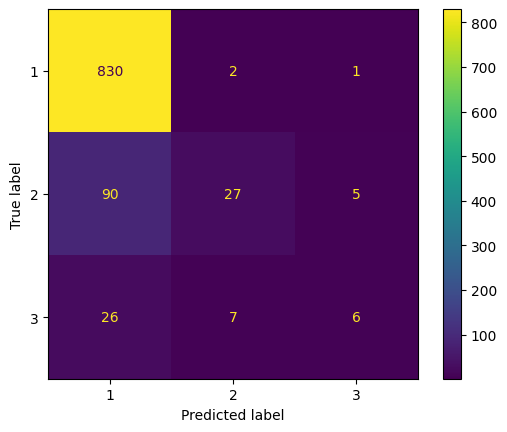

In [70]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_svc.classes_)
disp.plot()

In [71]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.88      1.00      0.93       833
           2       0.75      0.22      0.34       122
           3       0.50      0.15      0.24        39

    accuracy                           0.87       994
   macro avg       0.71      0.46      0.50       994
weighted avg       0.85      0.87      0.83       994



In [67]:
roc_auc_score(y_test, clf_svc.predict_proba(X_test_scaled), multi_class='ovo')

0.6771247801348365

## Oversampling

In [97]:
sm = SMOTE(random_state=1)
X_train_resample, y_train_resample = sm.fit_resample(X_train, y_train)

In [21]:
ros = RandomOverSampler(random_state=1)
X_train_resample, y_train_resample = ros.fit_resample(X_train, y_train)

In [22]:
X_train_resample.shape, X_test.shape, y_train_resample.shape, y_test.shape

((5715, 63), (994, 63), (5715,), (994,))

In [23]:
counter = Counter(y)
counter1 = Counter(y_train)
counter2 = Counter(y_train_resample)

In [24]:
counter, counter1, counter2

(Counter({1: 2738, 2: 416, 3: 158}),
 Counter({1: 1905, 2: 294, 3: 119}),
 Counter({1: 1905, 2: 1905, 3: 1905}))

## Scale

In [25]:
scaler = StandardScaler()
scaler.fit(X_train_resample)
X_train_scaled = scaler.transform(X_train_resample)
X_test_scaled = scaler.transform(X_test)

## Training

In [26]:
clf_svm = SVC(decision_function_shape='ovo',
              random_state=1,
              probability=True)
clf_svm.fit(X_train_scaled, y_train_resample)

SVC(decision_function_shape='ovo', probability=True, random_state=1)

## Testing

In [23]:
predictions = clf_svm.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions)

### SMOTE

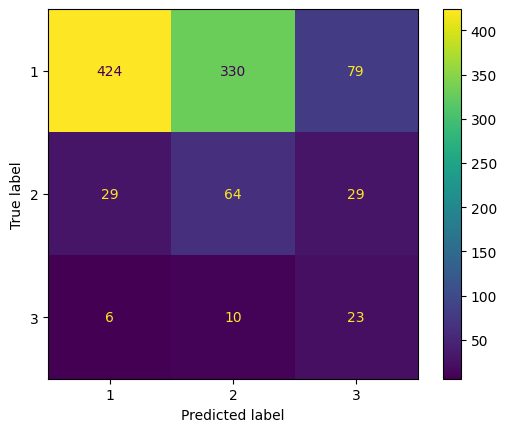

In [104]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_svm.classes_)
disp.plot()

In [105]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.92      0.51      0.66       833
           2       0.16      0.52      0.24       122
           3       0.18      0.59      0.27        39

    accuracy                           0.51       994
   macro avg       0.42      0.54      0.39       994
weighted avg       0.80      0.51      0.59       994



In [106]:
roc_auc_score(y_test, clf_svc.predict_proba(X_test_scaled), multi_class='ovo')

0.6829752918401493

### Random Over Sampling

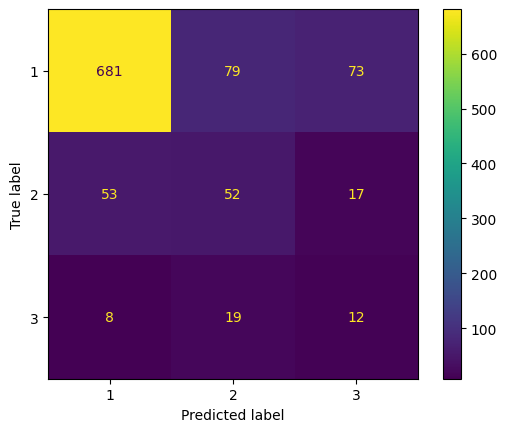

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_svm.classes_)
disp.plot()

In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.92      0.82      0.86       833
           2       0.35      0.43      0.38       122
           3       0.12      0.31      0.17        39

    accuracy                           0.75       994
   macro avg       0.46      0.52      0.47       994
weighted avg       0.82      0.75      0.78       994



In [26]:
roc_auc_score(y_test, clf_svc.predict_proba(X_test_scaled), multi_class='ovo')

0.6861294749089212

## GridSearchCV

In [27]:
param_grid = [
    {
        'C': [0.5, 1, 10, 30],
        'gamma': ['scale', 1, 0.1, 0.01, 0.001],
        'kernel': ['rbf']
    }
]

In [28]:
optimal_params = GridSearchCV(
    SVC(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=3
)

In [30]:
optimal_params.fit(X_train_scaled, y_train_resample)
# print(optimal_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.563 total time=   2.1s
[CV 2/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.589 total time=   2.1s
[CV 3/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.590 total time=   2.1s
[CV 4/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.566 total time=   2.1s
[CV 5/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.572 total time=   2.2s
[CV 1/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.686 total time=   1.8s
[CV 2/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.682 total time=   1.8s
[CV 3/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.681 total time=   2.1s
[CV 4/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.682 total time=   2.2s
[CV 5/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.686 total time=   2.3s
[CV 1/5] END ......C=0.5, gamma=0.1, kernel=rbf;, score=0.647 total time=   2.4s
[CV 2/5] END ......C=0.5, gamma=0.1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 30],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=3)

In [31]:
optimal_params.best_params_, optimal_params.best_score_

({'C': 10, 'gamma': 1, 'kernel': 'rbf'}, 0.7119860017497812)

In [37]:
param_grid = [
    {
        'C': [0.5, 1, 10, 30],
        'gamma': ['scale', 1, 0.1, 0.01, 0.001],
        'kernel': ['linear']
    }
]

In [38]:
optimal_params = GridSearchCV(
    SVC(),
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    verbose=3
)

In [40]:
optimal_params.fit(X_train_scaled, y_train_resample)
# print(optimal_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .C=0.5, gamma=scale, kernel=linear;, score=0.589 total time=   1.4s
[CV 2/5] END .C=0.5, gamma=scale, kernel=linear;, score=0.593 total time=   1.3s
[CV 3/5] END .C=0.5, gamma=scale, kernel=linear;, score=0.609 total time=   1.0s
[CV 4/5] END .C=0.5, gamma=scale, kernel=linear;, score=0.583 total time=   1.3s
[CV 5/5] END .C=0.5, gamma=scale, kernel=linear;, score=0.597 total time=   1.4s
[CV 1/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.589 total time=   1.2s
[CV 2/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.593 total time=   1.7s
[CV 3/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.609 total time=   1.1s
[CV 4/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.583 total time=   1.4s
[CV 5/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.597 total time=   1.2s
[CV 1/5] END ...C=0.5, gamma=0.1, kernel=linear;, score=0.589 total time=   1.1s
[CV 2/5] END ...C=0.5, gamma=0.1, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 30],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001],
                          'kernel': ['linear']}],
             scoring='f1_macro', verbose=3)

In [41]:
optimal_params.best_params_, optimal_params.best_score_

({'C': 10, 'gamma': 'scale', 'kernel': 'linear'}, 0.6193677907142293)

## Training

In [42]:
clf_svc = SVC(decision_function_shape='ovo',
              random_state=1,
              probability=True,
              C=10,
              gamma='scale',
              kernel='linear')
clf_svc.fit(X_train_scaled, y_train_resample)

SVC(C=10, decision_function_shape='ovo', kernel='linear', probability=True,
    random_state=1)

## Testing

In [47]:
predictions = clf_svc.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions)

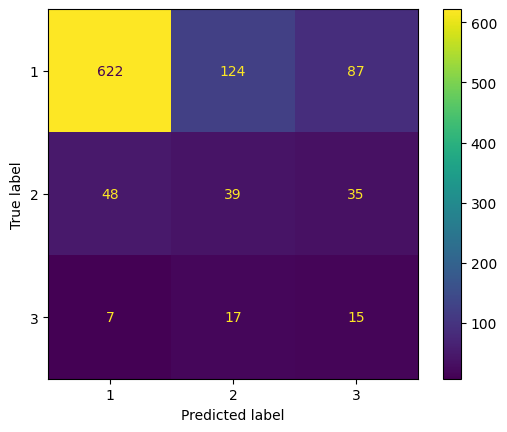

In [48]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_svc.classes_)
disp.plot()

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.92      0.75      0.82       833
           2       0.22      0.32      0.26       122
           3       0.11      0.38      0.17        39

    accuracy                           0.68       994
   macro avg       0.41      0.48      0.42       994
weighted avg       0.80      0.68      0.73       994



In [50]:
roc_auc_score(y_test, clf_svc.predict_proba(X_test_scaled), multi_class='ovo')

0.641857772953654